# 7. Final Models Comparison and Ensembling

## Comparing the Best Classification Models
This final notebook is used to compare the best models after we individually tried to do feature engineering, feature selection and hyperparameter tuning to the different classification techniques (e.g. SVM, Random Forest..), to obtain the best model for each classification technique.


### The goal is to compare and select the best model based on the improvements done on each individual models.

In [1]:
import warnings
warnings.filterwarnings('ignore') # Disable warnings due to versioning errors

import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import joblib
from FeatureSelectionUtils import import_final_selected_features_from_csv 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from Utils import plotMetricsGraphComparison 


#### Load our feature engineered data and create a test_metrics dataframe that will be used to compare the different models

In [2]:
# Initialise test_metrics dataframe to keep metrics of the different models
test_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Load in feature engineered data
X_train = pd.read_csv('Data/X_train_engineered.csv')
X_test = pd.read_csv('Data/X_test_engineered.csv')
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (20392, 1) (20392, 75)
Test Set  : (8176, 1) (8176, 75)


#### Load all the best model from each classification models with the best feature selection and hyperparameter tuning and create a chart to compare them.

In [9]:
# Step 1: Load all the best model from each classification models with the best feature selection and hyperparameter tuning done
BestModels = {
    'Best Logistic Regression': joblib.load('FinalModels/BestLogisticRegression.pkl'),
    'Best KNN': joblib.load('FinalModels/BestKNN.pkl'),
    "Best SVM" : joblib.load('FinalModels/BestSVM.pkl'),
    'Best Decision Tree': joblib.load('FinalModels/BestDecisionTree.pkl'),
    'Best Random Forest': joblib.load('FinalModels/BestRandomForest.pkl'),
    'Best Adaboost': joblib.load('FinalModels/BestAdaboost.pkl'),
    'Best Gradient Boosting': joblib.load('FinalModels/BestGradientBoosting.pkl'),
    'Best LightGBM': joblib.load('FinalModels/BestLightGBM.pkl')
}

# Map each model to their corresponding feature selecction file
BestModels_featureselection_files = {
    'Best Logistic Regression': 'FinalModels/Feature_Selection/Best Logistic Regression_selected_features.csv',
    'Best KNN': 'FinalModels/Feature_Selection/Best KNN_selected_features.csv',
    "Best SVM" : 'FinalModels/Feature_Selection/Best SVM_selected_features.csv',
    'Best Decision Tree': 'FinalModels/Feature_Selection/Best Decision Tree_selected_features.csv',
    'Best Random Forest': 'FinalModels/Feature_Selection/Best Random Forest_selected_features.csv',
    'Best Adaboost': 'FinalModels/Feature_Selection/Best Adaboost_selected_features.csv',
    'Best Gradient Boosting': 'FinalModels/Feature_Selection/Best Gradient Boosting_selected_features.csv',
    'Best LightGBM': 'FinalModels/Feature_Selection/Best LightGBM_selected_features.csv'
}

# Step 2: Load feature selections and evaluate models
test_metrics = pd.DataFrame()
for model_name, model in BestModels.items():
    # Load the corresponding feature selection CSV
    feature_selection_csv_path = BestModels_featureselection_files[model_name]
    selected_features = import_final_selected_features_from_csv(feature_selection_csv_path)
    X_test_feature_selected = X_test[selected_features]
    
    # Predict the output based on our training and testing dataset
    Y_test_pred = model.predict(X_test_feature_selected)
    
    test_metric = {
        "Classification Model": model_name,
        "Accuracy": accuracy_score(Y_test, Y_test_pred),
        "Precision": precision_score(Y_test, Y_test_pred),
        "Recall": recall_score(Y_test, Y_test_pred),
        "F1 Score": f1_score(Y_test, Y_test_pred)
    }
    
    # Save to overall metrics dataframe for comparison later
    test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)


In [14]:
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Best Logistic Regression,0.809442,0.539092,0.508323,0.523256
1,Best KNN,0.787671,0.484411,0.498811,0.491506
2,Best SVM,0.808586,0.536223,0.514863,0.525326
3,Best Decision Tree,0.804428,0.525665,0.505351,0.515308
4,Best Random Forest,0.823386,0.582296,0.500595,0.538363
5,Best Adaboost,0.822162,0.582489,0.478597,0.525457
6,Best Gradient Boosting,0.827911,0.595024,0.511891,0.550336
7,Best LightGBM,0.829990,0.602098,0.511891,0.553342


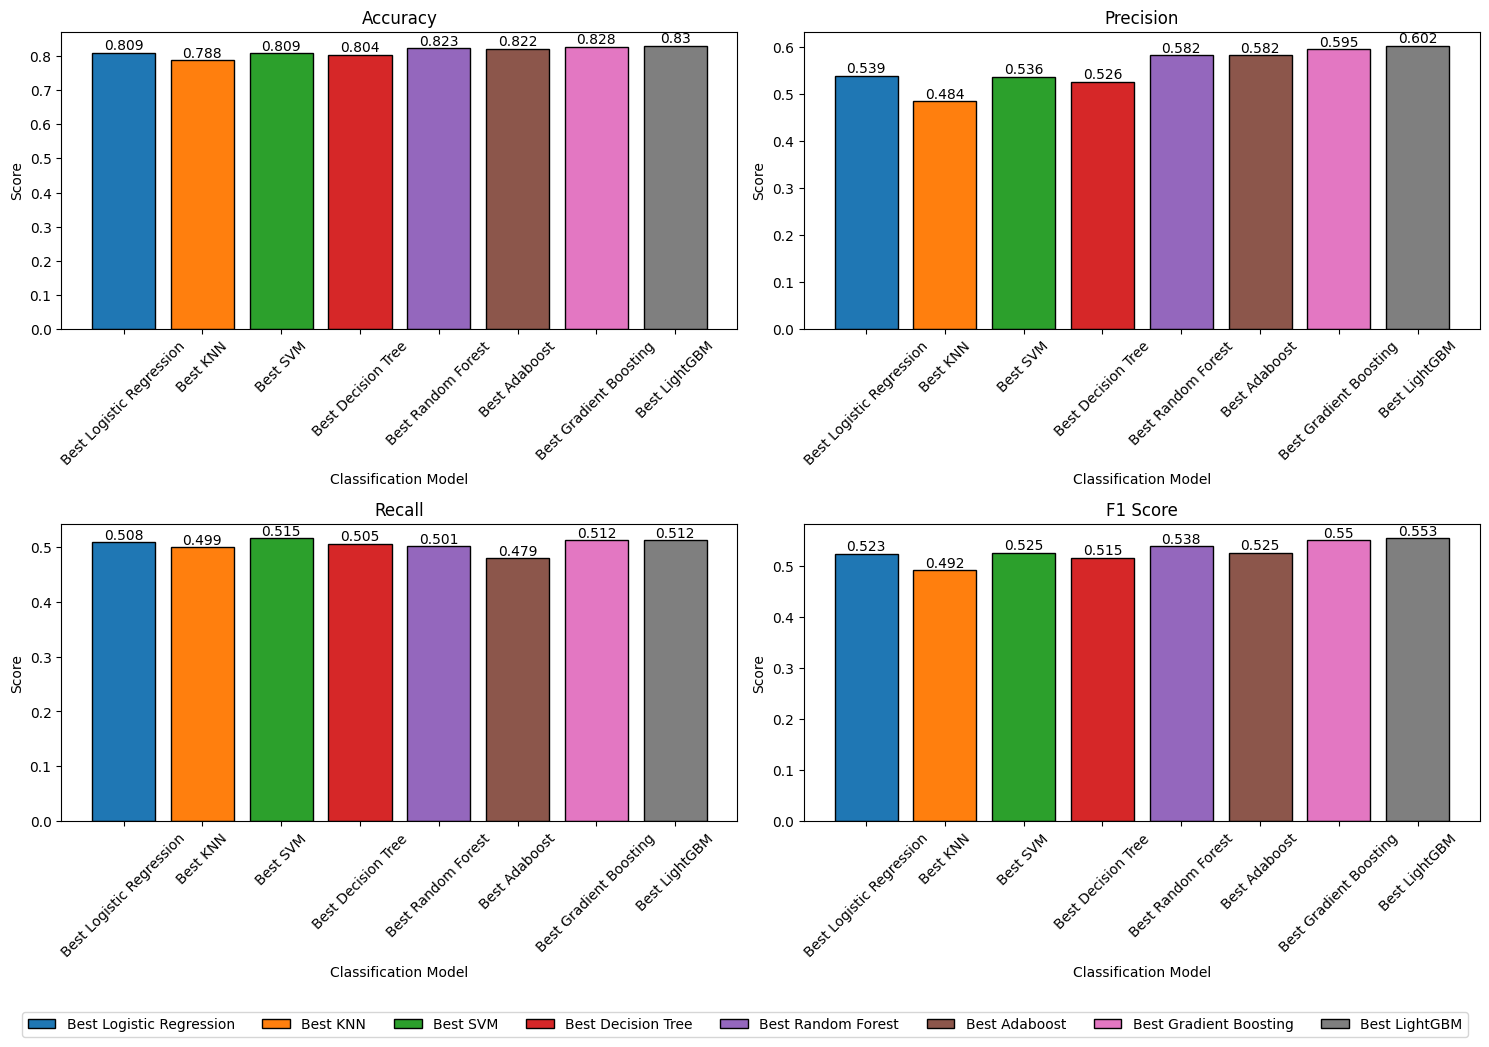

In [15]:
plotMetricsGraphComparison(test_metrics)

## Ensembling

### Importing datasets

In [10]:
X_train = pd.read_csv('Data/X_train_engineered.csv')
X_test = pd.read_csv('Data/X_test_engineered.csv')
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (20392, 1) (20392, 75)
Test Set  : (8176, 1) (8176, 75)


### Loading of pre-trained models and selected features

In [11]:
models = [
    {
    "model" : joblib.load('FinalModels/BestRandomForest.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best Random Forest_selected_features.csv')
    },
    {
    "model" : joblib.load('FinalModels/BestDecisionTree.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best Decision Tree_selected_features.csv')
    },
    {
    "model" : joblib.load('FinalModels/BestGradientBoosting.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best Gradient Boosting_selected_features.csv')
    },
    {
    "model" : joblib.load('FinalModels/BestAdaboost.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best Adaboost_selected_features.csv')
    },
    {
    "model" : joblib.load('FinalModels/BestLightGBM.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best LightGBM_selected_features.csv')
    },
    {
    "model" : joblib.load('FinalModels/BestSVM.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best SVM_selected_features.csv')
    },
    {
    "model" : joblib.load('FinalModels/BestKNN.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best KNN_selected_features.csv')
    },
     {
    "model" : joblib.load('FinalModels/BestLogisticRegression.pkl'),
    "selected_features" : import_final_selected_features_from_csv('FinalModels/Feature_Selection/Best Logistic Regression_selected_features.csv')
    },
]

### Stacking with K-Fold

We will first attempt ensembling using stacking with K-fold. We will use a base level of multiple models to make predictions, and then use another model (meta_model) at a higher level to combine these predictions into a final output.

We will attempt to use an self-defined function before using libaries to conduct stacking

In [12]:
def stacking_with_kfold(X_train, Y_train, X_test, Y_test, models, n_folds=5, meta_model = LogisticRegression()):
    meta_X_train = np.zeros((X_train.shape[0], len(models)))
    meta_X_test = np.zeros((X_test.shape[0], len(models)))

    metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

    kf = KFold(n_splits=n_folds, shuffle=True, random_state=47)
    for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Fold {fold+1}/{n_folds}")

        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        Y_train_fold, Y_val_fold = Y_train.iloc[train_index], Y_train.iloc[val_index]
        for i, model_info in enumerate(models):
            selected_features = model_info['selected_features']
            model = model_info['model']
            model.fit(X_train_fold[selected_features], Y_train_fold.values.ravel())
            meta_X_train[val_index, i] = model.predict_proba(X_val_fold[selected_features])[:, 1]

        for i, model_info in enumerate(models):
            model = model_info['model']
            selected_features = model_info['selected_features']
            y_val_pred = model.predict(X_val_fold[selected_features])
            acc = accuracy_score(Y_val_fold, y_val_pred)
            prec = precision_score(Y_val_fold, y_val_pred)
            rec = recall_score(Y_val_fold, y_val_pred)
            f1 = f1_score(Y_val_fold, y_val_pred)
            metrics = pd.concat([metrics, pd.DataFrame.from_dict([{
                'Model': type(model).__name__, 
                'Accuracy': acc, 
                'Precision': prec, 
                'Recall': rec, 
                'F1 Score': f1
            }])], ignore_index=True)
            print(f"{type(model).__name__} Validation Metrics: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

    meta_model.fit(meta_X_train, Y_train.values.ravel())
    
    for i, model_info in enumerate(models):
        model = model_info['model']
        selected_features = model_info['selected_features']
        meta_X_test[:, i] = model.predict_proba(X_test[selected_features])[:, 1]

    y_test_pred = meta_model.predict(meta_X_test)
    
    acc = accuracy_score(Y_test, y_test_pred)
    prec = precision_score(Y_test, y_test_pred)
    rec = recall_score(Y_test, y_test_pred)
    f1 = f1_score(Y_test, y_test_pred)
    metrics = pd.concat([metrics, pd.DataFrame.from_dict([{
                'Model':  'Stacked',
                'Accuracy': acc, 
                'Precision': prec, 
                'Recall': rec, 
                'F1 Score': f1
            }])], ignore_index=True)
    print(f"Stacked Test Metrics: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1={f1:.4f}")

    return metrics

def print_model_comparison(model_df):
    meta_model_metrics = model_df[model_df['Model'] == 'Stacked']
    other_model_performance = model_df[model_df['Model'] != 'Stacked'].groupby('Model').mean()
    num_models = len(other_model_performance.index) + 1
    colors = plt.cm.viridis(np.linspace(0, 1, num_models))

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    axes = axes.ravel()

    for i, metric in enumerate(metrics_to_plot):
        model_names = list(other_model_performance.index) + ['Stacked']
        metric_values = list(other_model_performance[metric]) + [meta_model_metrics[metric].values[0]]

        bars = axes[i].bar(model_names, metric_values, color=colors)

        for bar, value in zip(bars, metric_values):
            height = bar.get_height()
            axes[i].annotate(f'{value:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                             xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

        axes[i].set_ylim(min(metric_values) * 0.95, max(metric_values) * 1.05)

        axes[i].set_title(metric)
        axes[i].set_ylabel(metric)
        axes[i].set_xticks(range(len(model_names)))
        axes[i].set_xticklabels(model_names, rotation=45, ha='right')

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1.05))
    plt.tight_layout()
    plt.show()

#### Using logistic regression as the meta model

In [13]:
metrics_logistic_regression = stacking_with_kfold(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test, models=models, meta_model=LogisticRegression())
print(metrics_logistic_regression)

Fold 1/5
RandomForestClassifier Validation Metrics: Accuracy=0.8831, Precision=0.8997, Recall=0.8623, F1=0.8806
DecisionTreeClassifier Validation Metrics: Accuracy=0.8674, Precision=0.8780, Recall=0.8534, F1=0.8655
GradientBoostingClassifier Validation Metrics: Accuracy=0.8794, Precision=0.9010, Recall=0.8525, F1=0.8761
AdaBoostClassifier Validation Metrics: Accuracy=0.7877, Precision=0.7855, Recall=0.7917, F1=0.7886
LGBMClassifier Validation Metrics: Accuracy=0.8647, Precision=0.8843, Recall=0.8392, F1=0.8612
SVC Validation Metrics: Accuracy=0.8603, Precision=0.8739, Recall=0.8422, F1=0.8577
KNeighborsClassifier Validation Metrics: Accuracy=0.8598, Precision=0.8745, Recall=0.8402, F1=0.8570
LogisticRegression Validation Metrics: Accuracy=0.7973, Precision=0.8031, Recall=0.7877, F1=0.7953
Fold 2/5
RandomForestClassifier Validation Metrics: Accuracy=0.8870, Precision=0.8964, Recall=0.8700, F1=0.8830
DecisionTreeClassifier Validation Metrics: Accuracy=0.8632, Precision=0.8594, Recall=0.8

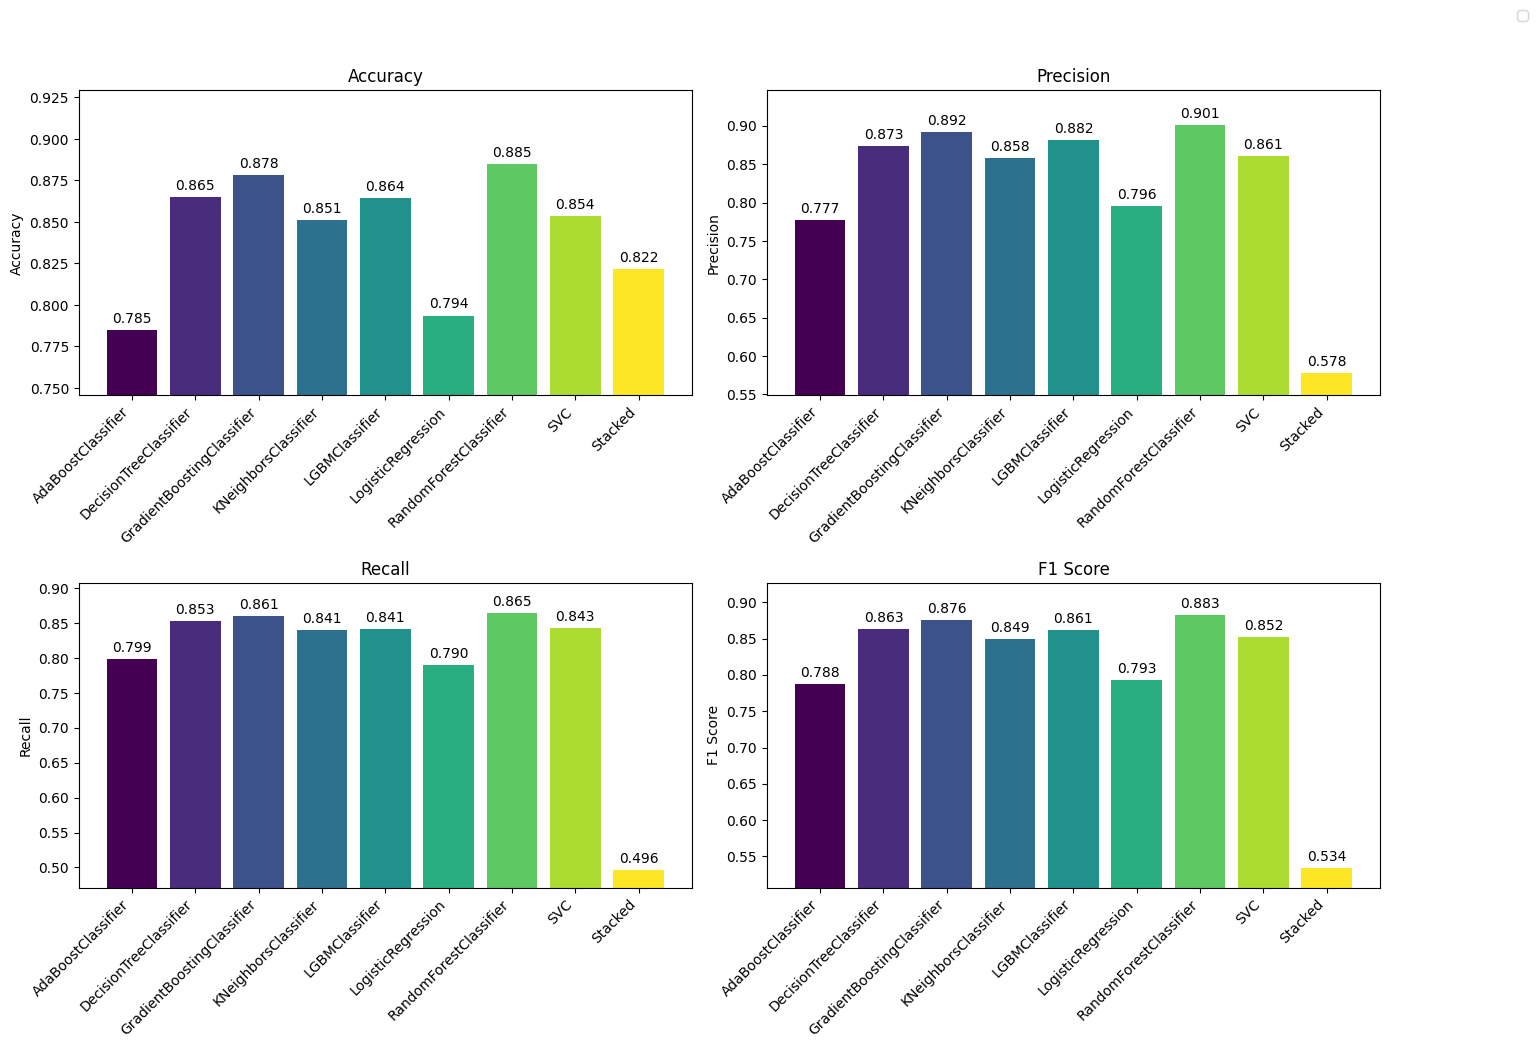

In [20]:
print_model_comparison(metrics_logistic_regression)

#### Using decision tree classifier as the mtea model

In [14]:
metrics_decision_tree = stacking_with_kfold(X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test, models=models, meta_model=DecisionTreeClassifier())
print(metrics_decision_tree)

Fold 1/5
RandomForestClassifier Validation Metrics: Accuracy=0.8831, Precision=0.8997, Recall=0.8623, F1=0.8806
DecisionTreeClassifier Validation Metrics: Accuracy=0.8674, Precision=0.8780, Recall=0.8534, F1=0.8655
GradientBoostingClassifier Validation Metrics: Accuracy=0.8794, Precision=0.9010, Recall=0.8525, F1=0.8761
AdaBoostClassifier Validation Metrics: Accuracy=0.7877, Precision=0.7855, Recall=0.7917, F1=0.7886
LGBMClassifier Validation Metrics: Accuracy=0.8647, Precision=0.8843, Recall=0.8392, F1=0.8612
SVC Validation Metrics: Accuracy=0.8603, Precision=0.8739, Recall=0.8422, F1=0.8577
KNeighborsClassifier Validation Metrics: Accuracy=0.8598, Precision=0.8745, Recall=0.8402, F1=0.8570
LogisticRegression Validation Metrics: Accuracy=0.7973, Precision=0.8031, Recall=0.7877, F1=0.7953
Fold 2/5
RandomForestClassifier Validation Metrics: Accuracy=0.8870, Precision=0.8964, Recall=0.8700, F1=0.8830
DecisionTreeClassifier Validation Metrics: Accuracy=0.8632, Precision=0.8594, Recall=0.8

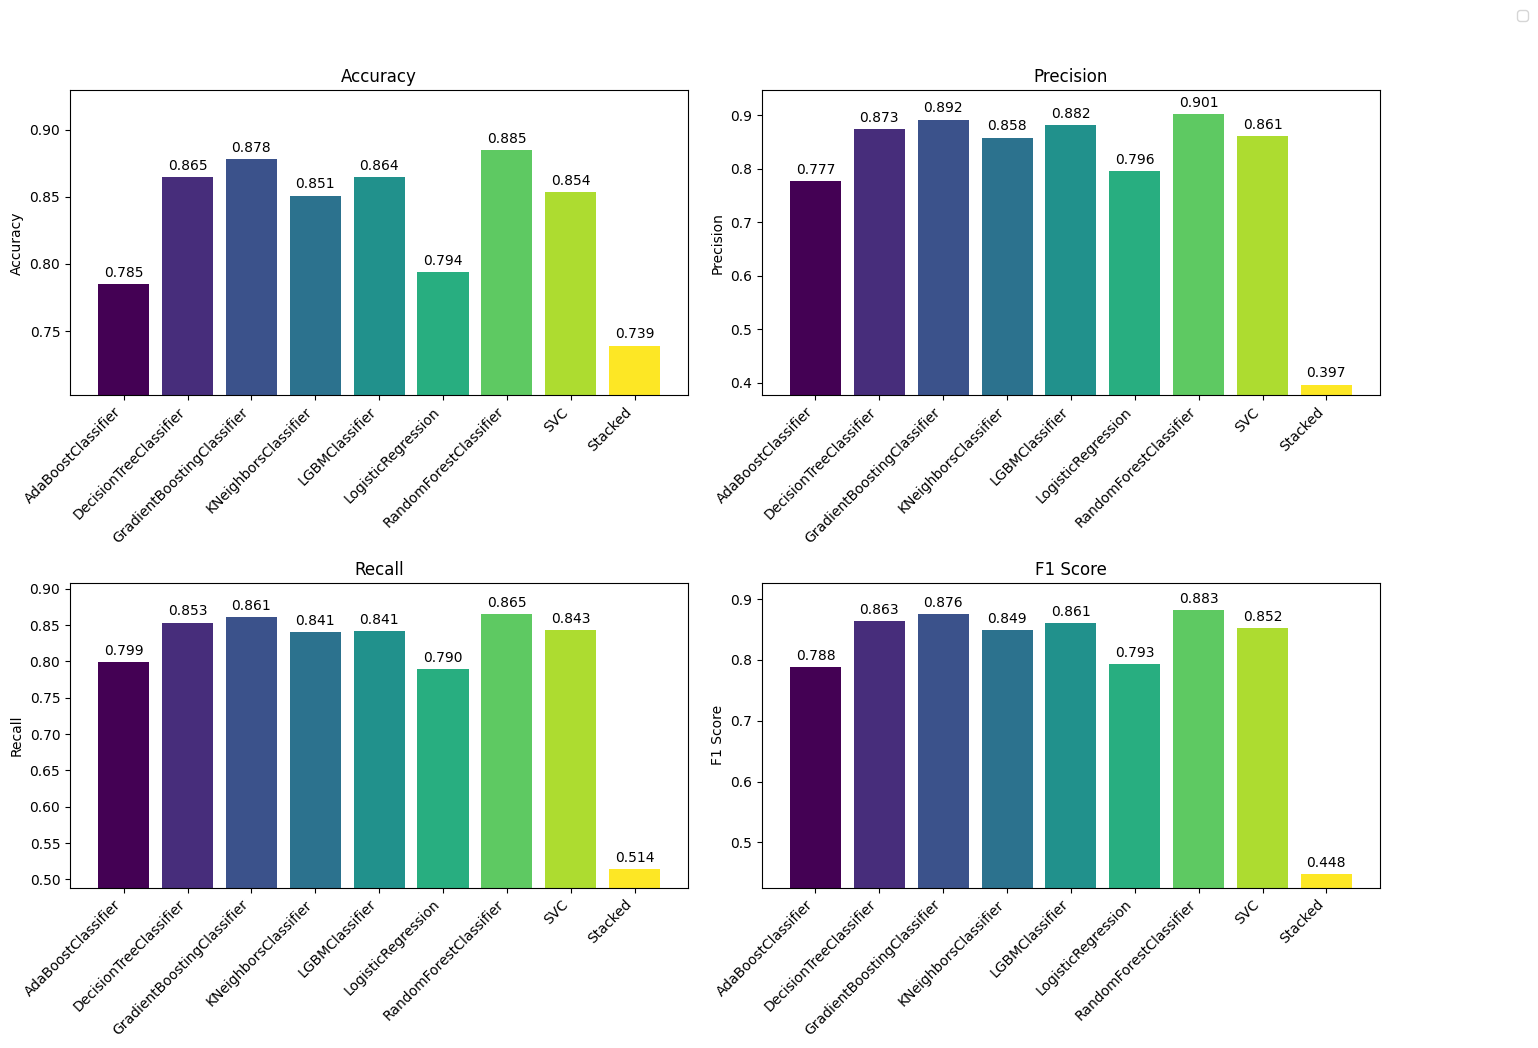

In [22]:
print_model_comparison(metrics_decision_tree)

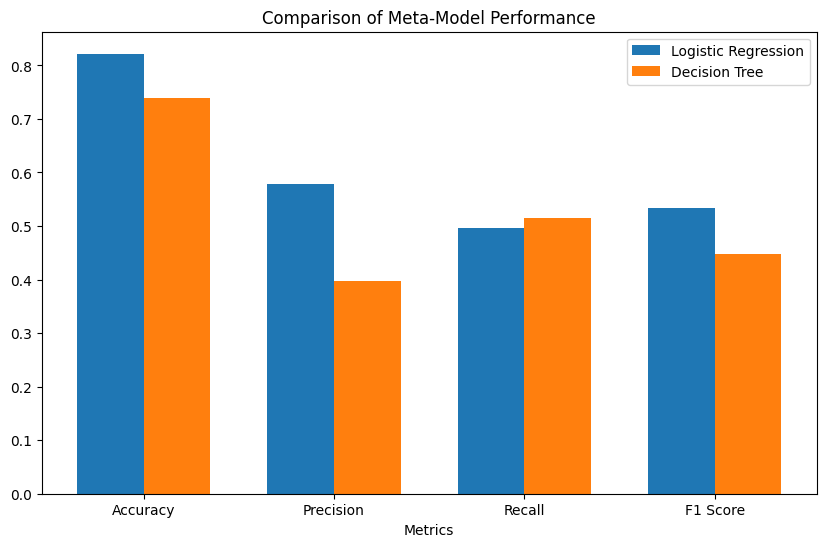

In [34]:
meta_lr_metrics = metrics_logistic_regression[metrics_logistic_regression['Model'] == 'Stacked'].mean(numeric_only=True)
meta_dt_metrics = metrics_decision_tree[metrics_decision_tree['Model'] == 'Stacked'].mean(numeric_only=True)

labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logistic_regression_scores = [meta_lr_metrics['Accuracy'], meta_lr_metrics['Precision'], meta_lr_metrics['Recall'], meta_lr_metrics['F1 Score']]
decision_tree_scores = [meta_dt_metrics['Accuracy'], meta_dt_metrics['Precision'], meta_dt_metrics['Recall'], meta_dt_metrics['F1 Score']]

x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, logistic_regression_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, decision_tree_scores, width, label='Decision Tree')

ax.set_xlabel('Metrics')
ax.set_title('Comparison of Meta-Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#### Analysis

It can be seen that there is a decrease in the score of the meta model accross all matrices.

A possible explaination is that stacking performance heavily relies on the diversity and accuracy of the base models. If the base models are too similar, have high bias, their ensemble prediction won't necessarily enhance performance. It might even degrade if the errors from the base models correlate.

### StackingClassifier from Sklearn

We will now attempt to use the StackingClassifier library from Sklearn to ensemble our models

In [4]:
estimators = [
     ('RandomForest',joblib.load('FinalModels/BestRandomForest.pkl')),
     ("DecisionTree", joblib.load('FinalModels/BestDecisionTree.pkl')),
     ("Adaboost",joblib.load('FinalModels/BestAdaboost.pkl')),
     ("GradientBoost",joblib.load('FinalModels/BestGradientBoosting.pkl')),
     ("LightGBM",joblib.load('FinalModels/BestLightGBM.pkl')),
     ('Best KNN', joblib.load('FinalModels/BestKNN.pkl')),
     ('Best Logistic Regression', joblib.load('FinalModels/BestLogisticRegression.pkl')),
     ('Best SVM', joblib.load('FinalModels/BestSVM.pkl'))
]

#### Using logistic regression has the meta model

In [5]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)
clf.fit(X_train, Y_train.values.ravel())
y_pred_lr = clf.predict(X_test)

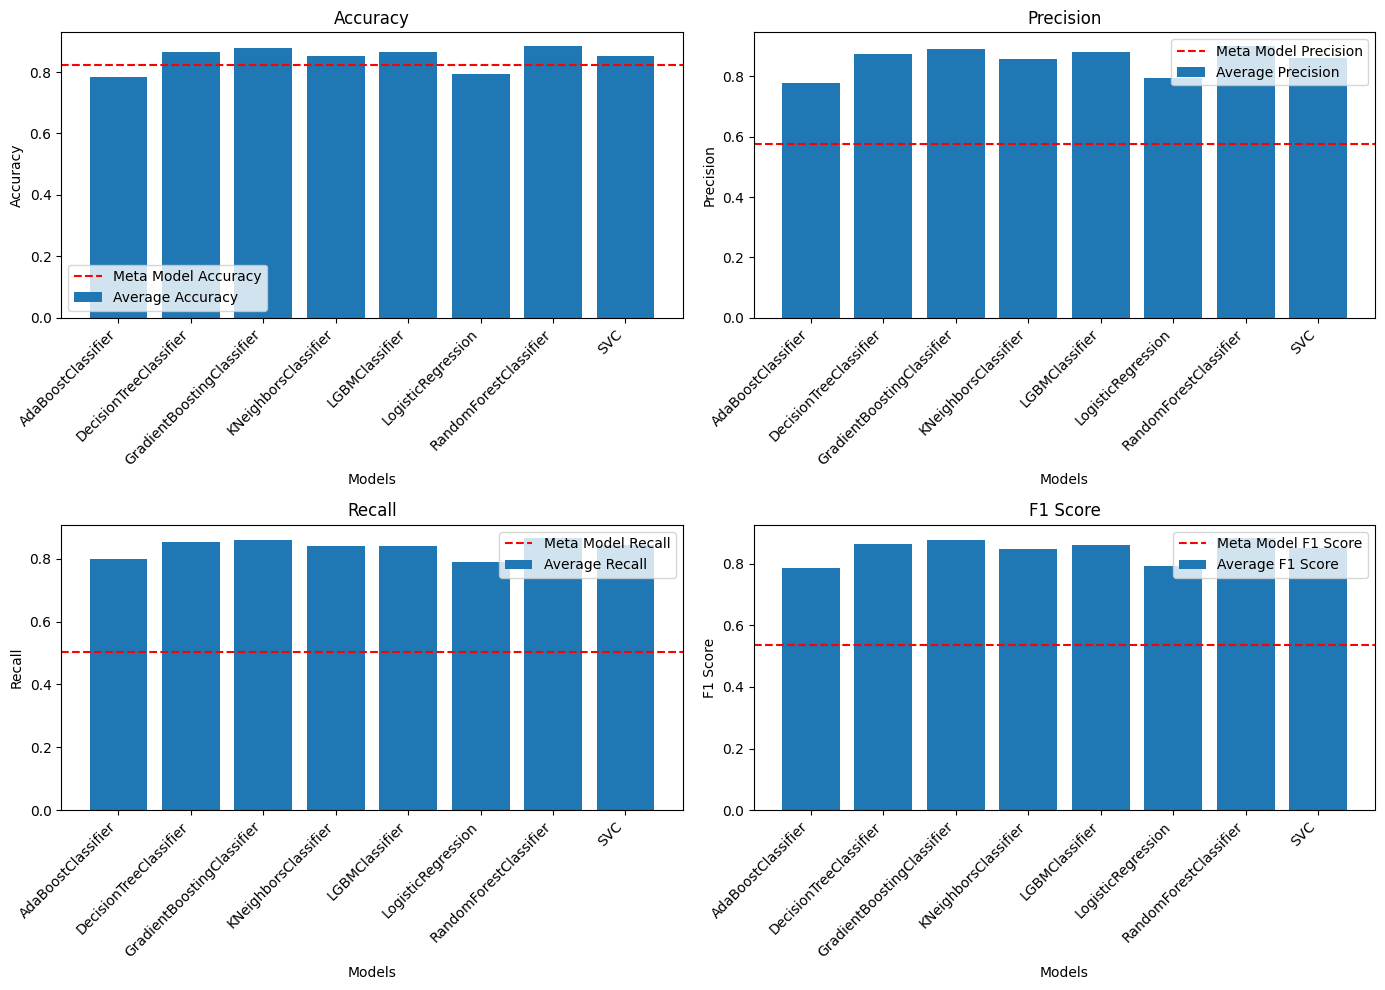

In [21]:
meta_model_metrics_lr = pd.DataFrame.from_dict([{
                'Model':  'Stacked',
                'Accuracy': accuracy_score(Y_test.values.ravel(),y_pred_lr),
                'Precision': precision_score(Y_test.values.ravel(),y_pred_lr), 
                'Recall': recall_score(Y_test.values.ravel(),y_pred_lr), 
                'F1 Score': f1_score(Y_test.values.ravel(),y_pred_lr)}])
model_performance = metrics_logistic_regression[metrics_logistic_regression['Model'] != 'Stacked'].groupby('Model').mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
axes = axes.ravel()
model_names = list(model_performance.index)

for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(model_performance.index, model_performance[metric], label='Average ' + metric)
    axes[i].axhline(y=meta_model_metrics_lr[metric].values[0], color='r', linestyle='--', label='Meta Model ' + metric)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Models')
    axes[i].set_xticklabels(model_performance.index, rotation=45, ha='right')
    axes[i].legend()

plt.tight_layout()
plt.show()


#### Using decision tree classifier as the meta model

In [22]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=DecisionTreeClassifier(),
    cv=5
)
clf.fit(X_train, Y_train.values.ravel())
y_pred_dt = clf.predict(X_test)

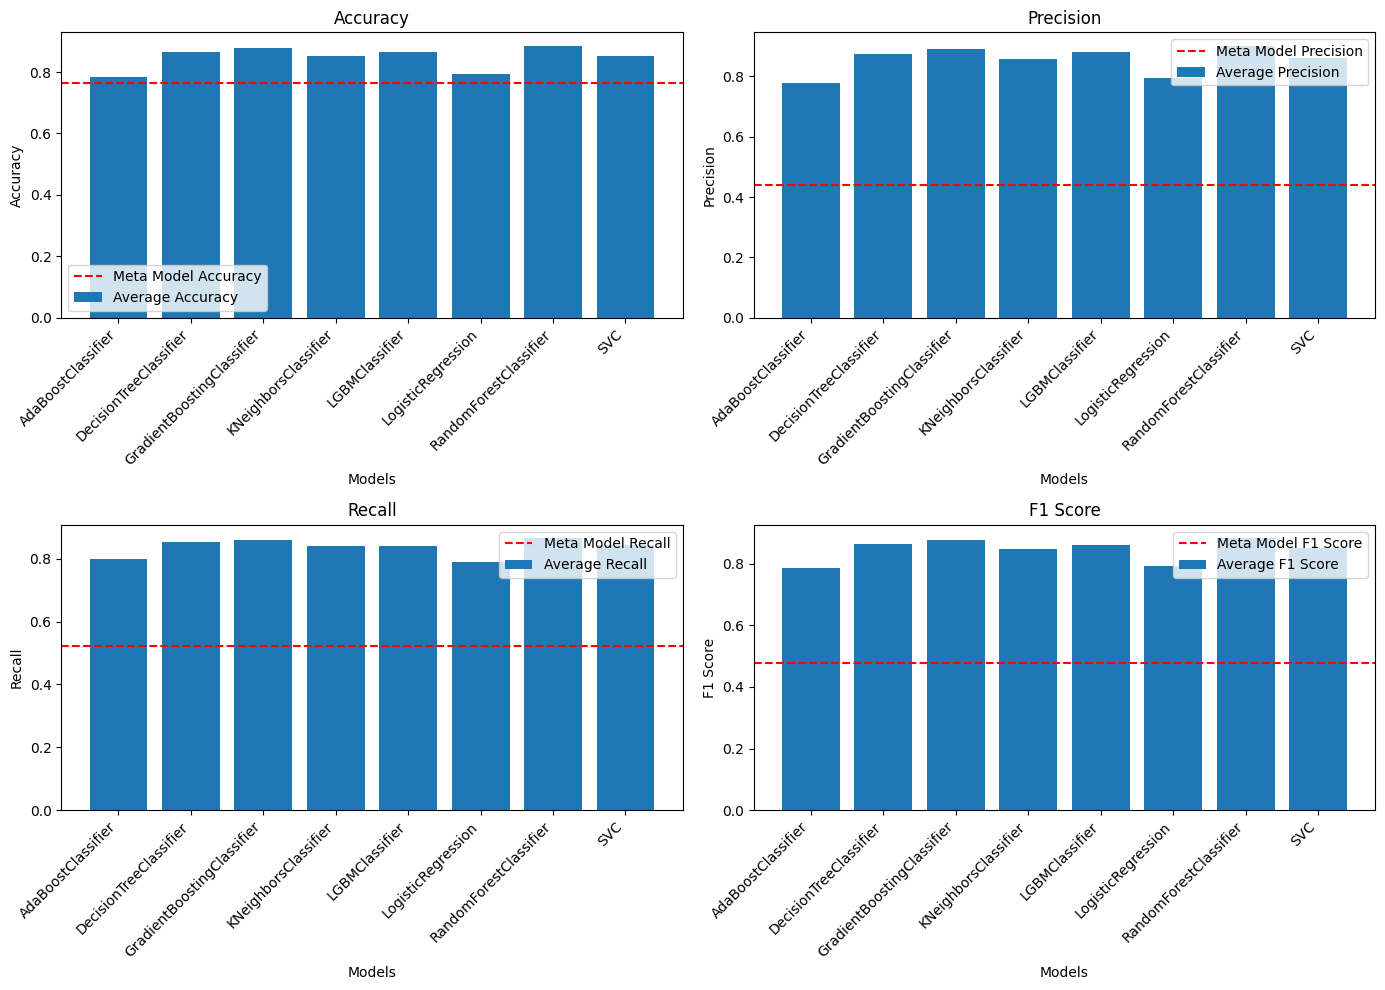

In [23]:
meta_model_metrics_dt = pd.DataFrame.from_dict([{
                'Model':  'SKlearn Logistic Regression',
                'Accuracy': accuracy_score(Y_test.values.ravel(),y_pred_dt),
                'Precision': precision_score(Y_test.values.ravel(),y_pred_dt), 
                'Recall': recall_score(Y_test.values.ravel(),y_pred_dt), 
                'F1 Score': f1_score(Y_test.values.ravel(),y_pred_dt)}])
model_performance = metrics_logistic_regression[metrics_logistic_regression['Model'] != 'Stacked'].groupby('Model').mean()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
axes = axes.ravel()
model_names = list(model_performance.index)

for i, metric in enumerate(metrics_to_plot):
    axes[i].bar(model_performance.index, model_performance[metric], label='Average ' + metric)
    axes[i].axhline(y=meta_model_metrics_dt[metric].values[0], color='r', linestyle='--', label='Meta Model ' + metric)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Models')
    axes[i].set_xticklabels(model_names, rotation=45, ha='right')
    axes[i].legend()

plt.tight_layout()
plt.show()

### Comparing all 4 implementations

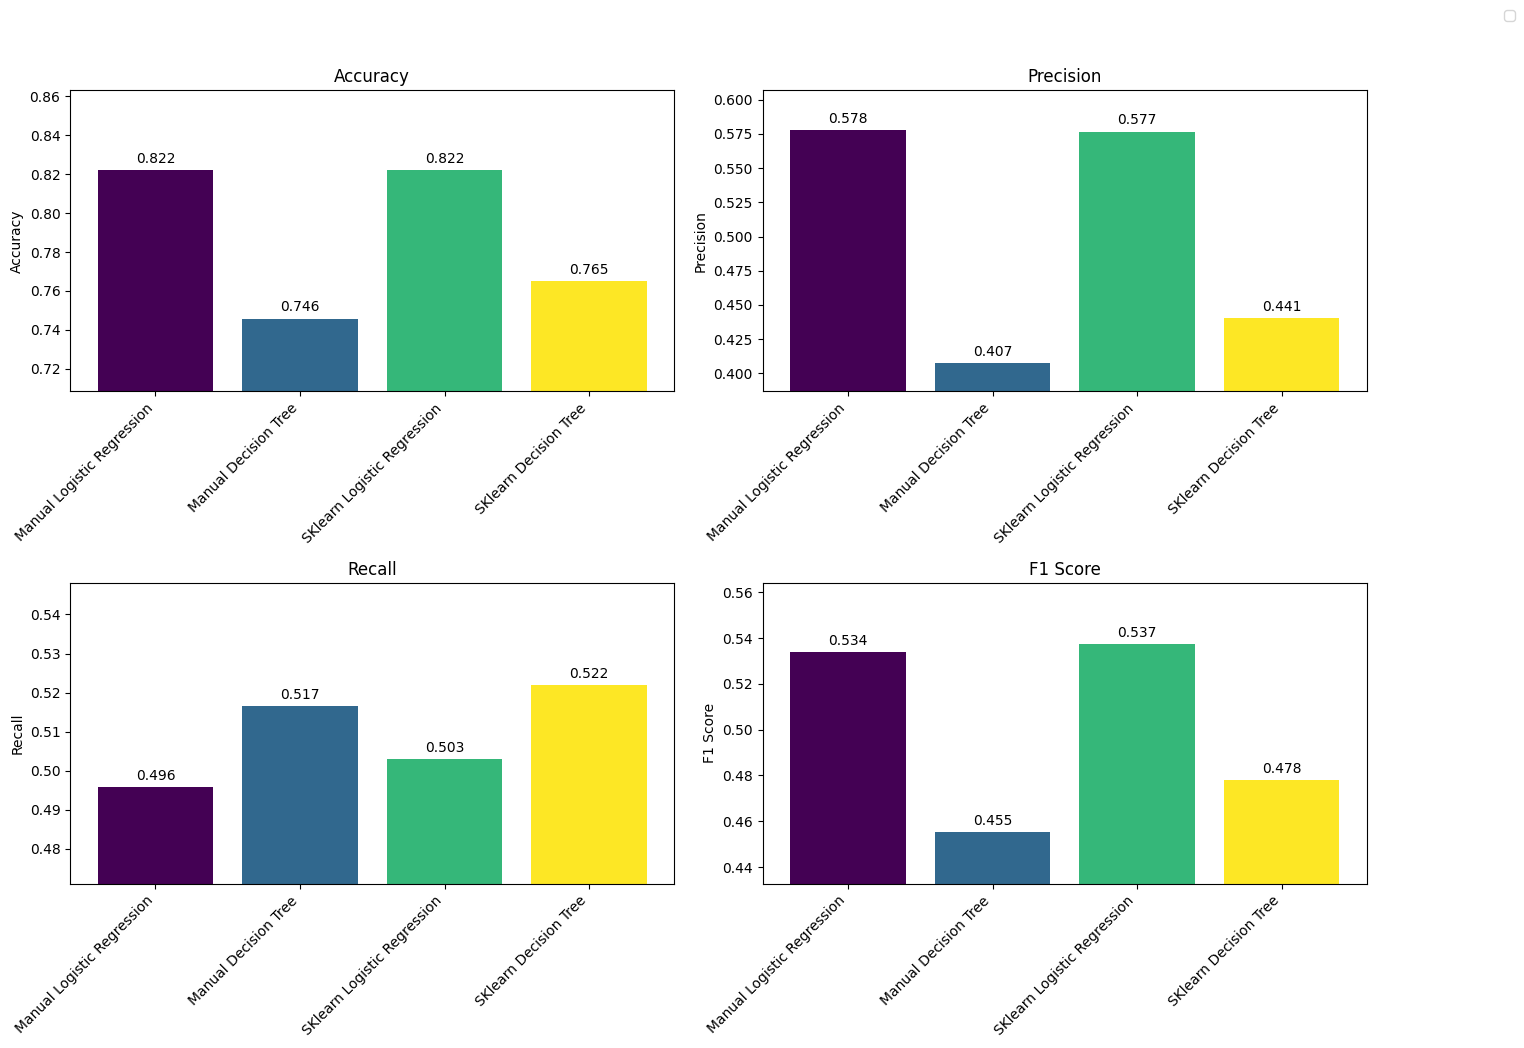

{'Manual Logistic Regression': Accuracy     0.821795
Precision    0.577963
Recall       0.495838
F1 Score     0.533760
dtype: float64, 'Manual Decision Tree': Accuracy     0.745841
Precision    0.407216
Recall       0.516647
F1 Score     0.455451
dtype: float64, 'SKlearn Logistic Regression': Model         Stacked
Accuracy     0.821795
Precision    0.576687
Recall       0.502973
F1 Score     0.537313
Name: 0, dtype: object, 'SKlearn Decision Tree': Model        SKlearn Logistic Regression
Accuracy                        0.765289
Precision                       0.440542
Recall                          0.521998
F1 Score                        0.477823
Name: 0, dtype: object}


In [24]:
stacking_results = {
    'Manual Logistic Regression': metrics_logistic_regression[metrics_logistic_regression['Model'] == 'Stacked'].mean(numeric_only=True),
    'Manual Decision Tree': metrics_decision_tree[metrics_decision_tree['Model'] == 'Stacked'].mean(numeric_only=True),
    'SKlearn Logistic Regression': meta_model_metrics_lr.iloc[0],
    'SKlearn Decision Tree': meta_model_metrics_dt.iloc[0]
}

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_models = len(stacking_results)
colors = plt.cm.viridis(np.linspace(0, 1, num_models))

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for i, metric in enumerate(metrics):
    model_names = list(stacking_results.keys())
    metric_values = [stacking_results[model][metric] for model in model_names]

    bars = axes[i].bar(model_names, metric_values, color=colors)

    for bar, value in zip(bars, metric_values):
        height = bar.get_height()
        axes[i].annotate(f'{value:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                            xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

    axes[i].set_ylim(min(metric_values) * 0.95, max(metric_values) * 1.05)
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xticks(range(len(model_names)))
    axes[i].set_xticklabels(model_names, rotation=45, ha='right')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.show()

print(stacking_results)

#### Analysis

The manual implementation of stacking with K fold seems to outperform that of sklearn. Looking at both implementations using logistic regression as the meta models, it can be seen that manual logistic regression has higher scores.

Using decision tree as a meta model only works better when we want to achieve a higher recall score. Else, logistic regression outperforms decision trees, likely due to its tendency to have less overfitting to training data.

### Comparing ensemble to individual models

In [25]:
metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_info in models:
    model = model_info['model']
    selected_features = model_info['selected_features']
    model.fit(X_train[selected_features], Y_train.values.ravel())
    y_pred = model.predict(X_test[selected_features])
    metrics = pd.concat([metrics, pd.DataFrame.from_dict([{
                'Model': type(model).__name__, 
                'Accuracy': accuracy_score(Y_test,y_pred), 
                'Precision': precision_score(Y_test,y_pred), 
                'Recall': recall_score(Y_test,y_pred), 
                'F1 Score': f1_score(Y_test,y_pred)
            }])], ignore_index=True)

manual_stacked_logistic = metrics_logistic_regression[metrics_logistic_regression['Model'] == 'Stacked'].iloc[0]
metrics = pd.concat([metrics, pd.DataFrame.from_dict([{
    'Model': 'Stacked',
    'Accuracy': manual_stacked_logistic['Accuracy'],
    'Precision': manual_stacked_logistic['Precision'],
    'Recall': manual_stacked_logistic['Recall'],
    'F1 Score': manual_stacked_logistic['F1 Score']
}])], ignore_index=True)

In [26]:
metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForestClassifier,0.823386,0.582296,0.500595,0.538363
1,DecisionTreeClassifier,0.804428,0.525665,0.505351,0.515308
2,GradientBoostingClassifier,0.827911,0.595024,0.511891,0.550336
3,AdaBoostClassifier,0.822162,0.582489,0.478597,0.525457
4,LGBMClassifier,0.829990,0.602098,0.511891,0.553342
5,SVC,0.808586,0.536223,0.514863,0.525326
6,KNeighborsClassifier,0.787671,0.484411,0.498811,0.491506
7,LogisticRegression,0.809442,0.539092,0.508323,0.523256
8,Stacked,0.821795,0.577963,0.495838,0.533760


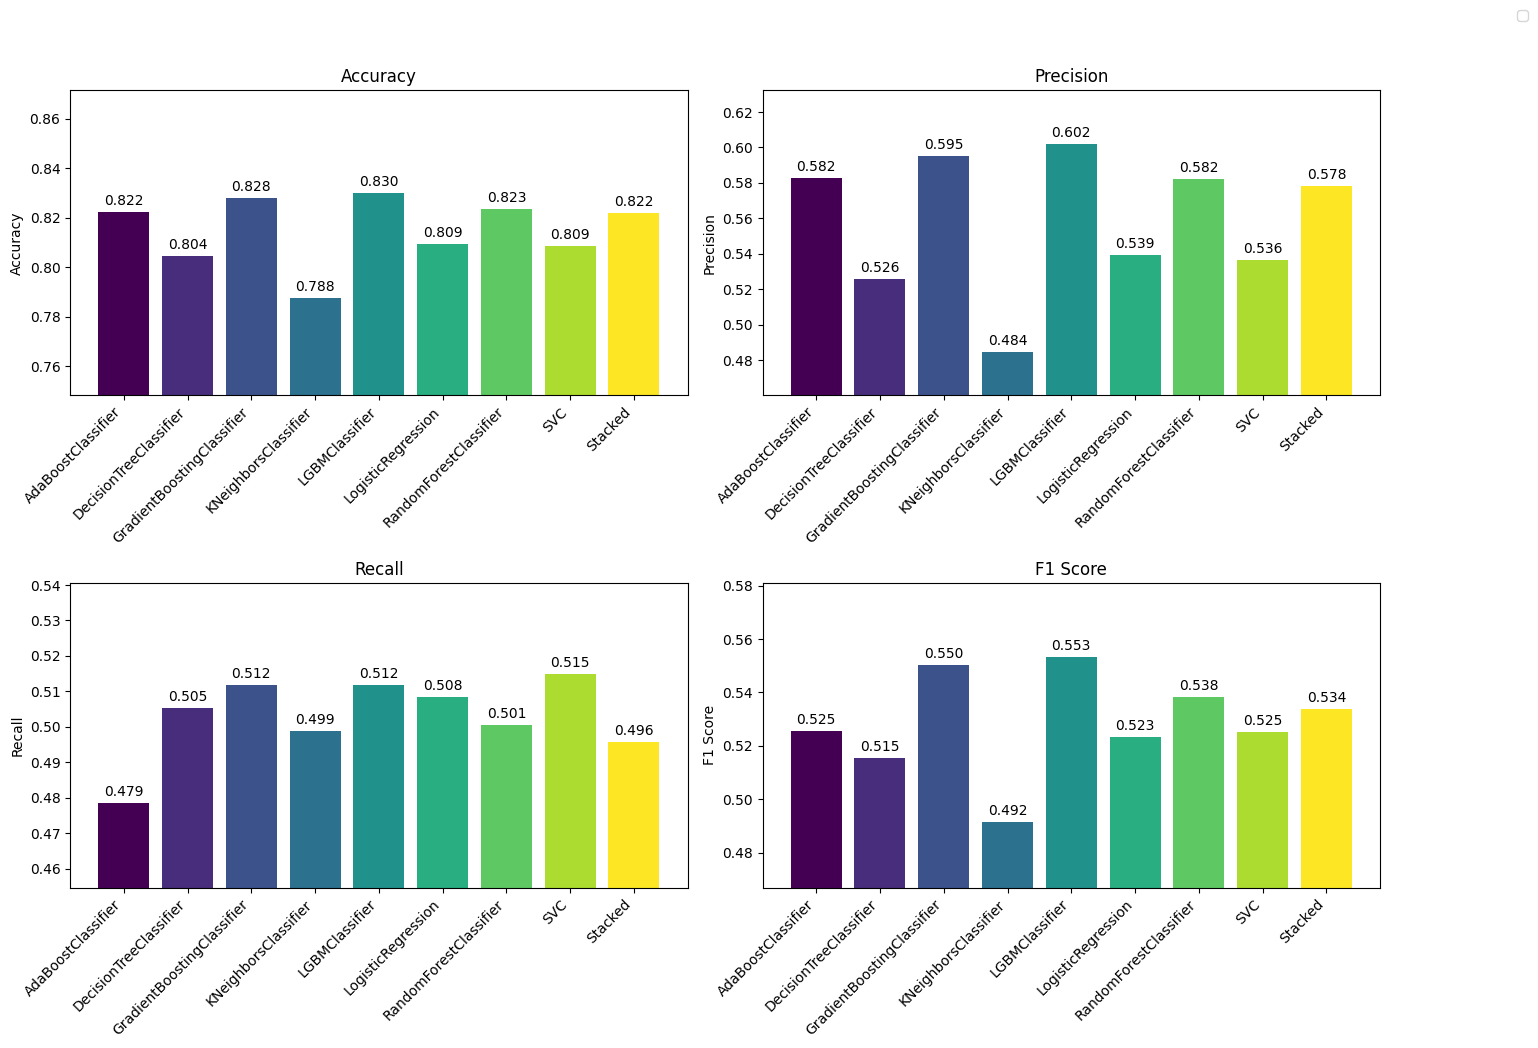

In [27]:
print_model_comparison(metrics)

#### Overall Analysis of Stacking Implementation with K-Folds

The manual implementation of stacking using k-folds integrates multiple prediction models to create a more robust model. This approach leverages the strengths of individual models to enhance overall predictive performance. While stacking generally outperforms each base model in various metrics, it is noteworthy that the Gradient Boosting model still retains a superior recall score compared to the stacked model.

However, in the case of this project where we are predicting if a customer will potentially cancel their hotel booking, recall becomes a crucial metric. A high recall score indicates a model's effectiveness in identifying true positives, which in this context means correctly predicting cancellations. This is essential for hotel management to implement preventative strategies and optimize booking capacities.


This observation suggests that while stacking increases precision and potentially overall accuracy, it may not uniformly improve every metric across all models. This can be particularly relevant in applications where recall is critically important, such as in medical diagnostics or fraud detection, indicating that a careful consideration of the trade-offs between different performance metrics is crucial when choosing between a single model and a stacked approach.



# Conclusion
## Summary and Findings (based on the overall project):
- Some attributes such as Lead Time, proved to be the most important in helping predict our data during the feature selection process (always kept by the different feature selection methods such as RFECV and Feature Importance).


- Feature Engineering and Boosting Techniques in particular led to big improvements in accuracy and f1 score as compared to baseline models.


- Our trained models are generally able to achieve > 0.8 accuracy but only >0.5 f1 score. We suspect this could be due to the quality of the data, as the features included may not be predictive enough to capture the dynamics of customer cancellations. In addition, the issue of imbalanced classes was fixed using undersampling techniques, but it may not have been able to truly address the imbalanced dataset.

## Future Recommendations:
####  1. Reduce data imbalance by recording more samples
The given dataset has some class imbalances and we made use of undersampling to remove the imbalance. But however, ideally the best way to do so is to record more samples with the minority label in order to reduce data imbalance.
#### 2. Leverage deep learning models
Leverage deep learning models for classification, especially since our dataset consists of a large number of features. Deep learning models can automatically extract and learn the best features and handle large dataset, which can potentially enhance the accuracy of our classification models
#### 3. Reduce anomalies and outliers
Another possible improvement is to remove any outliers and anomalies such that our models are more generalizable.
Some techniques includes using Isolation Forest, DBScan and LOF.